# Lead Score - Case Study

# Problem Statement
###  An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals and Objectives
### There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [191]:
#Import  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [192]:
#importing dataset to csv

leads=pd.read_csv("Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [193]:
leads.shape

(9240, 37)

In [194]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [195]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [196]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0
True

True

In [197]:
# check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

- No duplicate values in Prospect ID and Lead Number

# EXPLORATORY DATA ANALYSIS

In [198]:
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [199]:
leads = leads.replace('Select', np.nan)

In [200]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [201]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [202]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, axis=1, inplace = True)

In [203]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Categorical Attributes Analysis

In [204]:
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

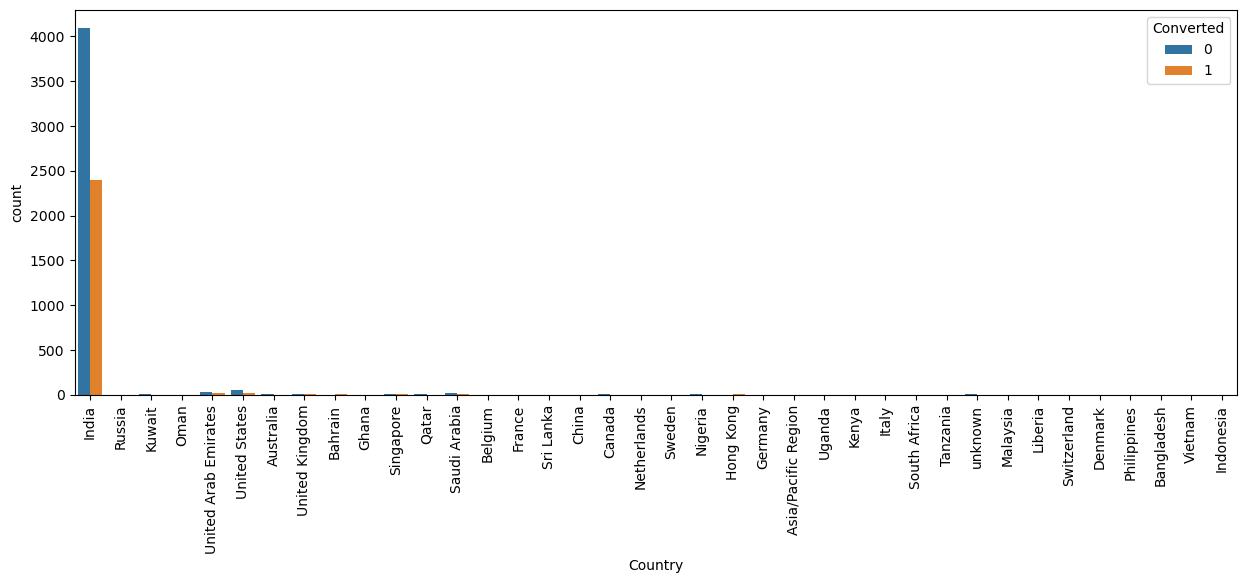

In [205]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1 = sns.countplot(x='Country', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [206]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India
leads['Country'] = leads['Country'].replace(np.nan,'India')

In [207]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Country', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [208]:
#creating a list of columns to be droppped
cols_to_drop=['Country']

In [209]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [210]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [211]:
plt.figure(figsize=(10,5))
s1=sns.countplot(x='City', hue='Converted',data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [212]:
#checking value counts of Specialization column
leads['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [213]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [214]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(10,5))
s1=sns.countplot(x='Specialization', hue='Converted',data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped

In [215]:
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [216]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(10,5))
s1=sns.countplot(x='Specialization', hue='Converted',data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [217]:
#What is your current occupation
leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [218]:
#imputing Nan values with mode "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [219]:
leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

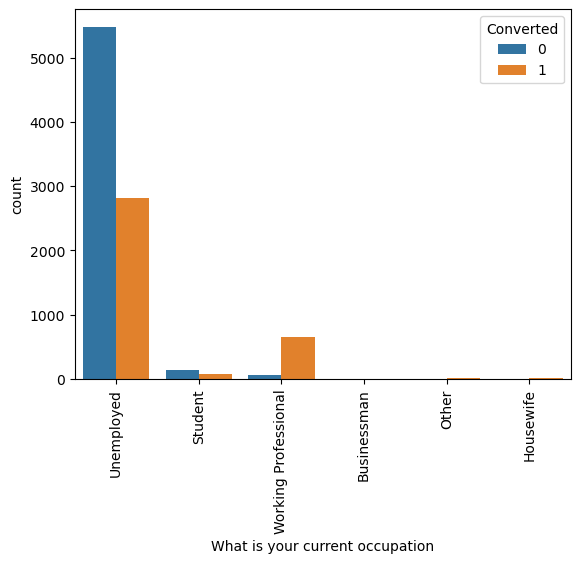

In [220]:
#visualizing count of Variable based on Converted value
s1=sns.countplot(x='What is your current occupation', hue='Converted',data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

In [221]:
#checking value counts
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [222]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

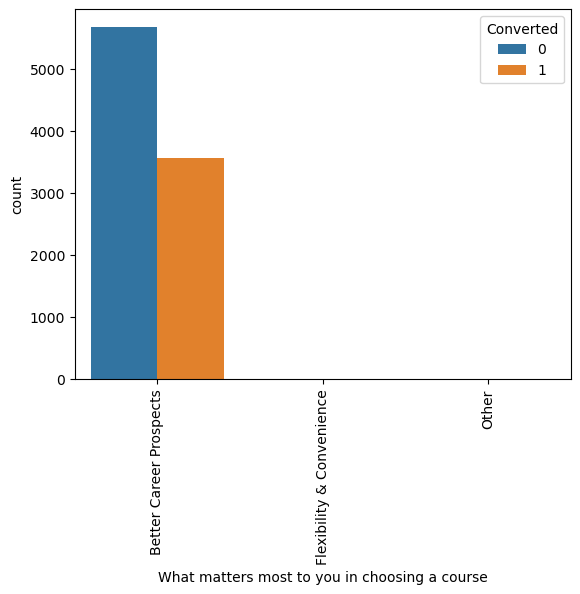

In [223]:
s1=sns.countplot(x='What matters most to you in choosing a course', hue='Converted',data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [224]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [225]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [226]:
leads['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [227]:
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

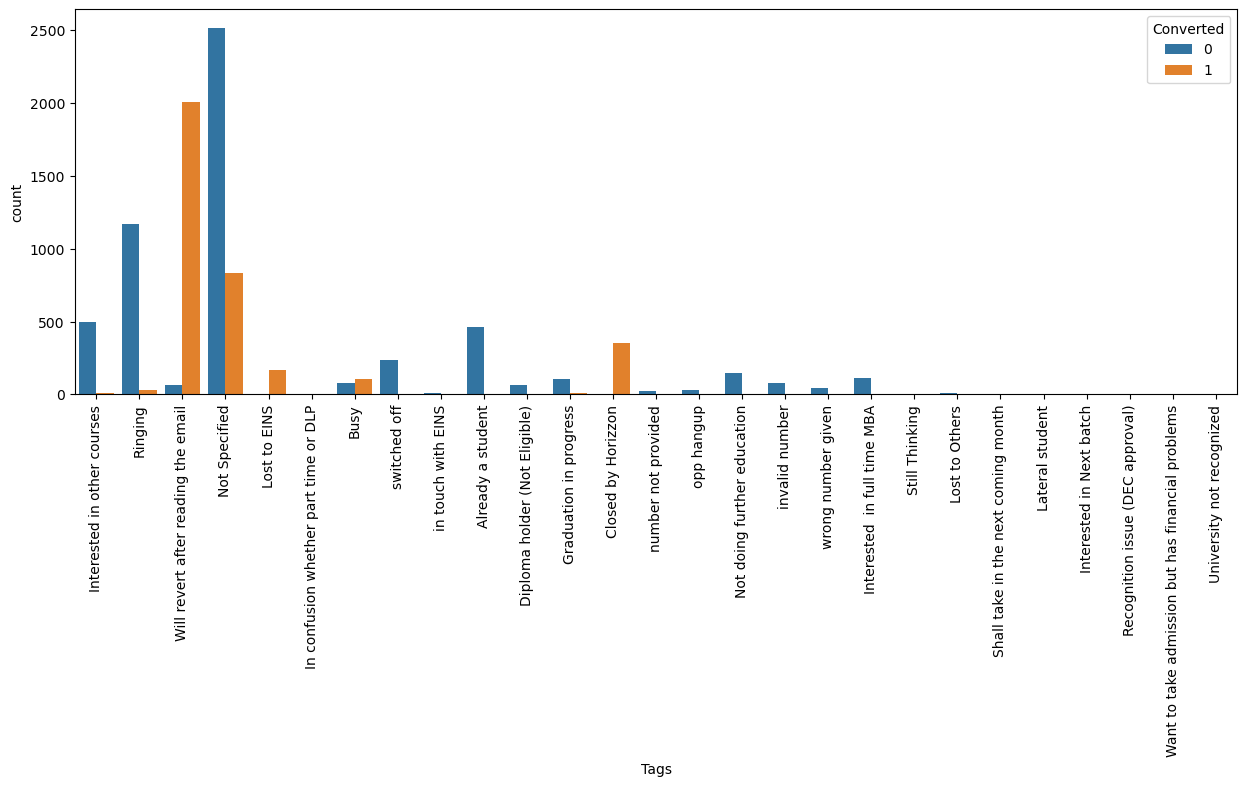

In [228]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Tags', hue='Converted',data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [229]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [230]:
#percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [231]:
leads['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [232]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

- We can group some of the lower frequency occuring labels under a common label 'Others'

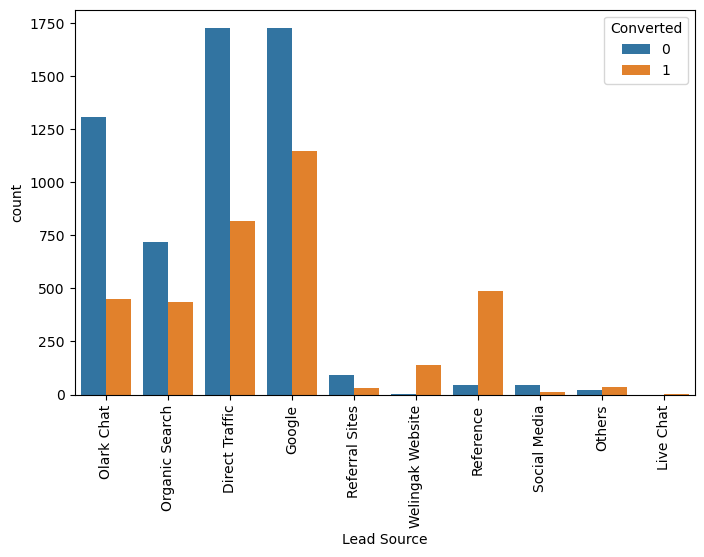

In [233]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x='Lead Source', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Google and direct visits are bringing in the most new customers.
- People who come from referrals or the Welingak website are more likely to buy.
- To improve sales overall, we should focus on making more people buy from Google, direct visits, and online chats.
- We should also try to get more customers from referrals and the Welingak website.

In [234]:
leads['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [235]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [236]:
leads['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [237]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [238]:
leads = leads.dropna()

In [239]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [240]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

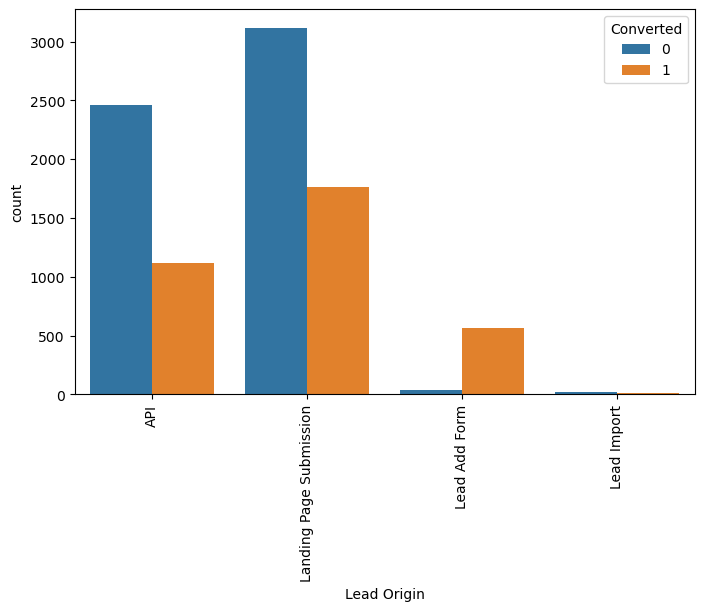

In [241]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x='Lead Origin', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

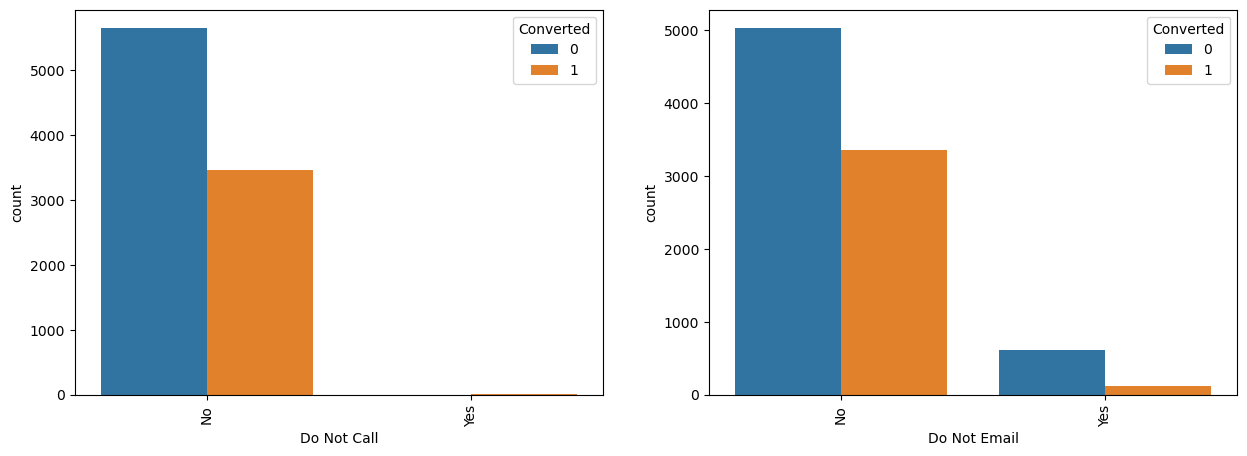

In [242]:
#Do Not Email & Do Not Call
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(x='Do Not Call', hue='Converted',data=leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x='Do Not Email', hue='Converted',data=leads)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

- We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [243]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [244]:
leads.Search.value_counts(dropna=False)

Search
No     9089
Yes      14
Name: count, dtype: int64

In [245]:
leads.Magazine.value_counts(dropna=False)

Magazine
No    9103
Name: count, dtype: int64

In [246]:
leads['Newspaper Article'].value_counts(dropna=False)

Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64

In [247]:
#adding imbalanced columns to the list of columns to be dropped
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [248]:
leads['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [249]:
#clubbing lower frequency values
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                
                                                                    'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

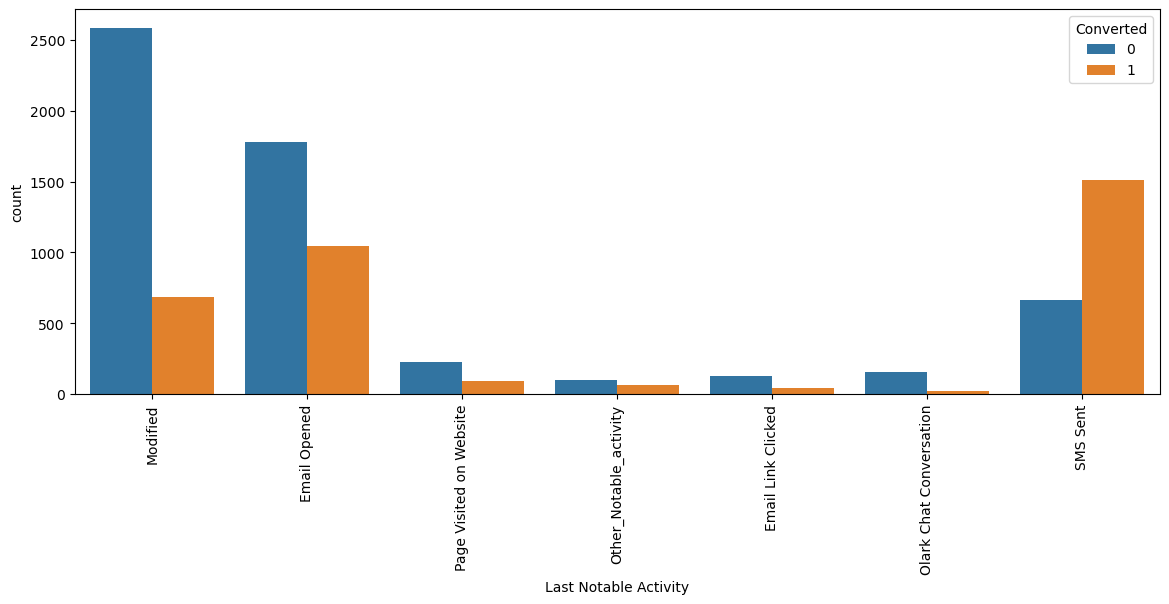

In [250]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [251]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [252]:
#dropping columns
leads = leads.drop(cols_to_drop,axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

## Numerical Attributes Analysis

In [253]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

In [254]:
numeric_data = leads.select_dtypes(include=['float64', 'int64'])

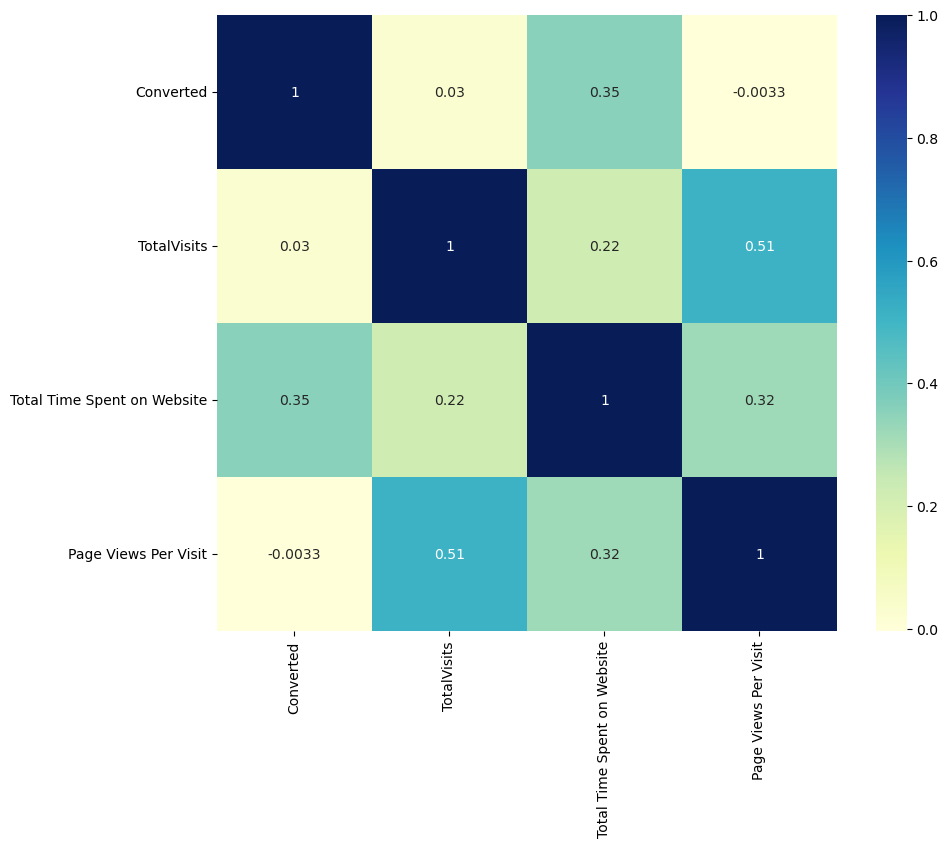

In [255]:
#Checking correlations of numeric values by heat map
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

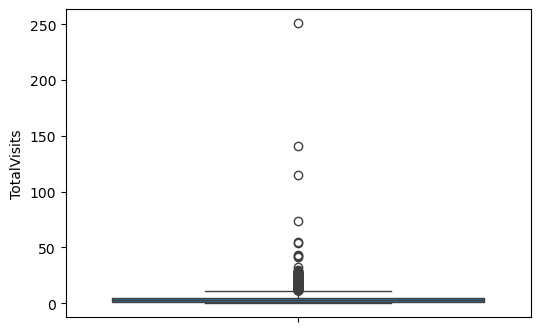

In [256]:
#Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

- outliers are present

In [257]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

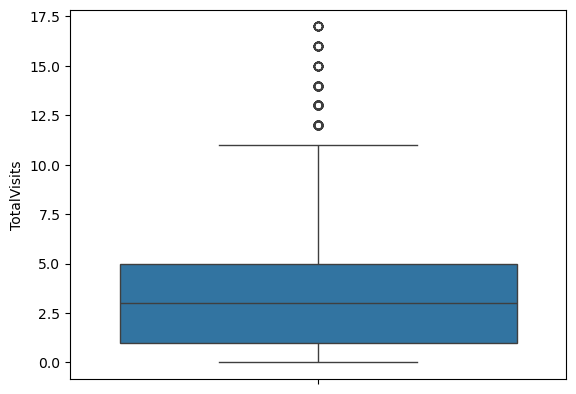

In [258]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

### Numerical Column

In [259]:
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

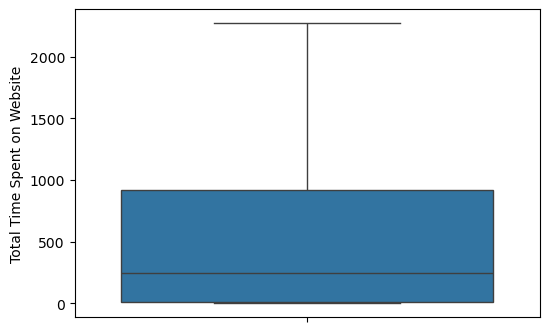

In [260]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

- Because there are no extreme values in this data, we don't need to remove any unusual numbers.

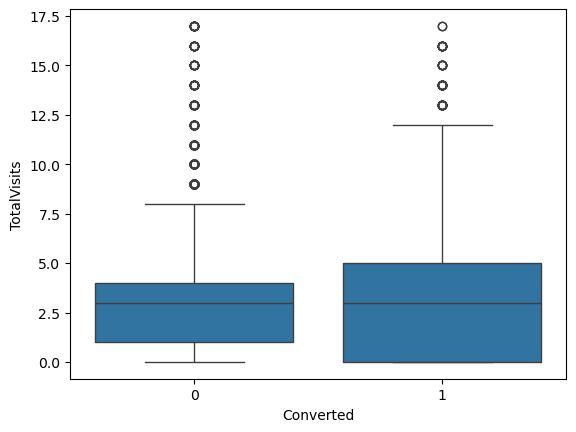

In [261]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

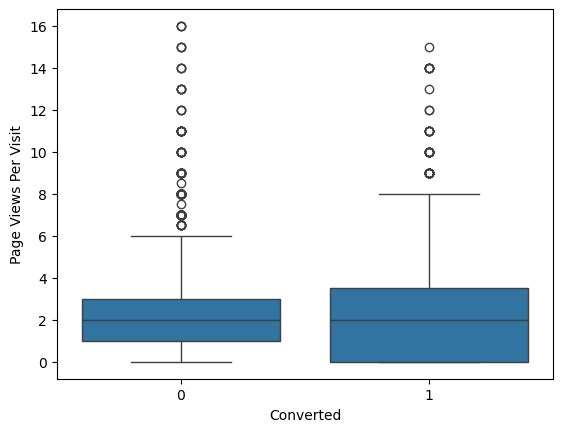

In [262]:
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()


- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [263]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

- No missing values in the columns

# Dummy Variable Creation

In [264]:
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [265]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[varlist] = leads[varlist].apply(binary_map)

In [266]:
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],axis=1)

In [267]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'],axis= 1)
leads = pd.concat([leads, dummy], axis = 1)

In [268]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [269]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'],axis= 1)
leads = pd.concat([leads, dummy], axis = 1)

In [270]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'],axis= 1)
leads = pd.concat([leads, dummy], axis = 1)

In [271]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'],axis= 1)
leads = pd.concat([leads, dummy], axis = 1)

In [272]:
#dropping the original columns after dummy variable creation
leads.drop(cat_cols,axis=1,inplace = True)

In [273]:
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  What is your current occupation_Housewife  \
0                    False                                      False   
1                    False                                      False   
2                    False                                      False   
3                    False                                      False   
4                    False                                      False   

   What is your current occupation_Other  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   What is your current occupation_Student  ...  \
0                                    False  ...   
1                                    False  ...   
2                                     True  ...   
3                                    False  ...   
4                                    False  ...   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
0                           False      False                    False   
1                           False      False                    False   
2                           False      False                    False   
3                           False      False                    False   
4                           False      False                    False   

   Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
0                              True              False            False   
1                             False              False            False   
2                             False              False            False   
3                             False              False            False   
4                             False              False            False   

   Tags_Ringing  Tags_Will revert after reading the email  
0         False                                     False  
1          True                                     False  
2         False                                      True  
3          True                                     False  
4         False                                      True  

[5 rows x 57 columns]

# Test-Train Split

In [274]:
# Import the required library
from sklearn.model_selection import train_test_split

In [275]:
X = leads.drop(['Converted'],axis= 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  What is your current occupation_Housewife  \
0                    False                                      False   
1                    False                                      False   
2                    False                                      False   
3                    False                                      False   
4                    False                                      False   

   What is your current occupation_Other  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   What is your current occupation_Student  \
0                                    False   
1                                    False   
2                                     True   
3                                    False   
4                                    False   

   What is your current occupation_Unemployed  ...  \
0                                        True  ...   
1                                        True  ...   
2                                       False  ...   
3                                        True  ...   
4                                        True  ...   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
0                           False      False                    False   
1                           False      False                    False   
2                           False      False                    False   
3                           False      False                    False   
4                           False      False                    False   

   Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
0                              True              False            False   
1                             False              False            False   
2                             False              False            False   
3                             False              False            False   
4                             False              False            False   

   Tags_Ringing  Tags_Will revert after reading the email  
0         False                                     False  
1          True                                     False  
2         False                                      True  
3          True                                     False  
4         False                                    

In [276]:
# Putting the target variable in y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [278]:
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [279]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1735     0.235294                     0.191021              0.250000   
1713     0.411765                     0.490757              0.437500   
2235     0.411765                     0.330546              0.437500   
792      0.117647                     0.031690              0.125000   
5664     0.294118                     0.700704              0.104375   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1735                                 True                      False   
1713                                 True                      False   
2235                                 True                      False   
792                                  True                      False   
5664                                 True                      False   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
1735                    False                                      False   
1713                    False                                      False   
2235                    False                                      False   
792                     False                                      False   
5664                    False                                      False   

      What is your current occupation_Other  \
1735                                  False   
1713                                  False   
2235                                  False   
792                                   False   
5664                                  False   

      What is your current occupation_Student  \
1735                                    False   
1713                                    False   
2235                                    False   
792                                     False   
5664                                    False   

      What is your current occupation_Unemployed  ...  \
1735                                        True  ...   
1713                                        True  ...   
2235                                        True  ...   
792                                         True  ...   
5664                                        True  ...   

      Last Notable Activity_Olark Chat Conversation  \
1735                                          False   
1713                                          False   
2235                                          False   
792                                           False   
5664                                          False   

      Last Notable Activity_Page Visited on Website  \
1735                                          False   
1713                                          False   
2235                                          False   
792                                           False   
5664                                          False   

      Last Notable Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
1735                           False      False                    False   
1713                           False      False                    False   
2235                           False      False                    False   
792                            False      False                    False   
5664                            True      False                    False   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
1735                             False              False            False   
1713                             False              False            False   
2235                             False              False            False   
792                              False              False            False   
5664                             False              False            False   

      Tags_Ringing  Tags_Will revert after reading the email  
1735         False                                     False  
1713         False                              

In [280]:
# To check the correlation among varibles
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr())
plt.show()

- Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

In [281]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [283]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6314 entries, 2873 to 5783
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6314 non-null   float64
 1   Total Time Spent on Website                           6314 non-null   int64  
 2   Page Views Per Visit                                  6314 non-null   float64
 3   Lead Origin_Landing Page Submission                   6314 non-null   bool   
 4   Lead Origin_Lead Add Form                             6314 non-null   bool   
 5   Lead Origin_Lead Import                               6314 non-null   bool   
 6   What is your current occupation_Housewife             6314 non-null   bool   
 7   What is your current occupation_Other                 6314 non-null   bool   
 8   What is your current occupation_Student               6314 n

##  Scaling of Data

In [284]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2873     0.271781                     0.031598              0.814423   
6823     1.276480                     2.389158              2.274024   
7258    -1.067817                    -0.874028             -1.131710   
8327     1.611379                     1.982176              0.167334   
5940    -0.732918                    -0.701703             -0.645177   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2873                                 True                      False   
6823                                 True                      False   
7258                                False                      False   
8327                                 True                      False   
5940                                 True                      False   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
2873                    False                                      False   
6823                    False                                      False   
7258                    False                                      False   
8327                    False                                      False   
5940                    False                                      False   

      What is your current occupation_Other  \
2873                                  False   
6823                                  False   
7258                                  False   
8327                                  False   
5940                                  False   

      What is your current occupation_Student  \
2873                                    False   
6823                                    False   
7258                                    False   
8327                                    False   
5940                                    False   

      What is your current occupation_Unemployed  ...  \
2873                                       False  ...   
6823                                        True  ...   
7258                                        True  ...   
8327                                        True  ...   
5940                                        True  ...   

      Last Notable Activity_Olark Chat Conversation  \
2873                                          False   
6823                                          False   
7258                                          False   
8327                                           True   
5940                                          False   

      Last Notable Activity_Page Visited on Website  \
2873                                          False   
6823                                          False   
7258                                          False   
8327                                          False   
5940                                          False   

      Last Notable Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
2873                           False      False                     True   
6823                            True      False                    False   
7258                           False      False                    False   
8327                           False      False                    False   
5940                           False      False                    False   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
2873                             False              False            False   
6823                             False              False            False   
7258                             False              False            False   
8327                             False              False            False   
5940                             False              False            False   

      Tags_Ringing  Tags_Will revert after reading the email  
2873         False                                     False  
6823         False                              

# Model Building

In [285]:
import statsmodels.api as sm

In [286]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [287]:
from sklearn.feature_selection import RFE

In [288]:
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [289]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('What is your current occupation_Housewife', False, 27),
 ('What is your current occupation_Other', False, 33),
 ('What is your current occupation_Student', False, 17),
 ('What is your current occupation_Unemployed', False, 16),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 31),
 ('City_Other Cities of Maharashtra', False, 30),
 ('City_Other Metro Cities', False, 34),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 24),
 ('Specialization_Banking, Investment And Insurance', False, 18),
 ('Specialization_Business Administration', False, 23),
 ('Specialization_E-Business', False, 22),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', Fa

In [290]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')


In [291]:
X_train[col].dtypes

Total Time Spent on Website                             float64
Lead Origin_Lead Add Form                                  bool
What is your current occupation_Working Professional       bool
Lead Source_Direct Traffic                                 bool
Lead Source_Google                                         bool
Lead Source_Organic Search                                 bool
Lead Source_Welingak Website                               bool
Last Activity_SMS Sent                                     bool
Last Notable Activity_Modified                             bool
Tags_Closed by Horizzon                                    bool
Tags_Interested in other courses                           bool
Tags_Lost to EINS                                          bool
Tags_Other_Tags                                            bool
Tags_Ringing                                               bool
Tags_Will revert after reading the email                   bool
dtype: object

In [292]:
X_train.isnull().sum()

TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
What is your current occupation_Housewife               0
What is your current occupation_Other                   0
What is your current occupation_Student                 0
What is your current occupation_Unemployed              0
What is your current occupation_Working Professional    0
City_Other Cities                                       0
City_Other Cities of Maharashtra                        0
City_Other Metro Cities                                 0
City_Thane & Outskirts                                  0
City_Tier II Cities                                     0
Specialization_Banking, Investment And Insurance        0
Specialization

In [293]:
y_train.isnull().sum()

0

In [294]:
X_train = X_train.dropna()  # or X_train_sm.fillna(value)
y_train = y_train.dropna()

In [295]:
X_train.dtypes

TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_Landing Page Submission                        bool
Lead Origin_Lead Add Form                                  bool
Lead Origin_Lead Import                                    bool
What is your current occupation_Housewife                  bool
What is your current occupation_Other                      bool
What is your current occupation_Student                    bool
What is your current occupation_Unemployed                 bool
What is your current occupation_Working Professional       bool
City_Other Cities                                          bool
City_Other Cities of Maharashtra                           bool
City_Other Metro Cities                                    bool
City_Thane & Outskirts                                     bool
City_Tier II Cities                     

In [296]:
X_train = pd.get_dummies(X_train[col], drop_first=True)

In [297]:
y_train = y_train.astype(float)

In [298]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [299]:
#BUILDING MODEL #1

X_train = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.1
Date:                Fri, 11 Oct 2024   Deviance:                       2480.3
Time:                        22:44:42   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6062
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- p-value of variable Lead Origin_Lead Add Form is high, so we can drop it.

In [300]:
#dropping column with high p-value
col = col.drop('Lead Origin_Lead Add Form')

In [301]:
#BUILDING MODEL #2

X_train = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.7
Date:                Fri, 11 Oct 2024   Deviance:                       2485.4
Time:                        22:44:42   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6058
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5583      0.113     -4.924      0.000      -0.781      -0.336
Total Time Spent on Website                              1.0668      0.060     17.682      0.000       0.949       1.185
What is your current occupation_Working Professional     1.1123      0.397      2.802      0.005       0.334       1.890
Lead Source_Direct Traffic                              -1.4948      0.167     -8.945      0.000      -1.822      -1.167
Lead Source_Google                                      -1.0334      0.151     -6.856      0.000      -1.329      -0.738
Lead Source_Organic Search                              -1.0742      0.193     -5.567      0.000      -1.452      -0.696
Lead Source_Welingak Website                             4.3576      0.740      5.889      0.000       2.907       5.808
Last Activity_SMS Sent                                   2.1697      0.117     18.618      0.000       1.941       2.398
Last Notable Activity_Modified                          -1.7279      0.127    -13.628      0.000      -1.976      -1.479
Tags_Closed by Horizzon                                  7.5835      1.015      7.472      0.000       5.594       9.573
Tags_Interested in other courses                        -2.0190      0.398     -5.067      0.000      -2.800      -1.238
Tags_Lost to EINS                                        6.0693      0.611      9.930      0.000       4.871       7.267
Tags_Other_Tags                                         -2.3834      0.213    -11.212      0.000      -2.800      -1.967
Tags_Ringing                                            -3.4155      0.243    -14.027      0.000      -3.893      -2.938
Tags_Will revert after reading the email                 4.4765      0.192     23.348      0.000       4.101       4.852
========================================================================================================================
"""

- p-value of variable What is your current occupation_Working Professional is high, so we can drop it.

In [302]:
#dropping column with high p-value
col = col.drop('What is your current occupation_Working Professional')

In [303]:
#BUILDING MODEL 3

X_train = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.0
Date:                Fri, 11 Oct 2024   Deviance:                       2494.1
Time:                        22:44:43   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6053
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5553      0.113     -4.903      0.000      -0.777      -0.333
Total Time Spent on Website                  1.0669      0.060     17.696      0.000       0.949       1.185
Lead Source_Direct Traffic                  -1.4877      0.167     -8.907      0.000      -1.815      -1.160
Lead Source_Google                          -1.0344      0.150     -6.873      0.000      -1.329      -0.739
Lead Source_Organic Search                  -1.0786      0.193     -5.599      0.000      -1.456      -0.701
Lead Source_Welingak Website                 4.3528      0.740      5.882      0.000       2.903       5.803
Last Activity_SMS Sent                       2.1722      0.116     18.666      0.000       1.944       2.400
Last Notable Activity_Modified              -1.7239      0.126    -13.629      0.000      -1.972      -1.476
Tags_Closed by Horizzon                      7.7078      1.013      7.607      0.000       5.722       9.694
Tags_Interested in other courses            -1.9727      0.399     -4.940      0.000      -2.755      -1.190
Tags_Lost to EINS                            6.0934      0.610      9.989      0.000       4.898       7.289
Tags_Other_Tags                             -2.3603      0.212    -11.121      0.000      -2.776      -1.944
Tags_Ringing                                -3.4063      0.243    -14.045      0.000      -3.882      -2.931
Tags_Will revert after reading the email     4.6442      0.187     24.824      0.000       4.277       5.011
============================================================================================================
"""

- Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [304]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [305]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                         Lead Source_Google  1.74
1                 Lead Source_Direct Traffic  1.71
6             Last Notable Activity_Modified  1.58
5                     Last Activity_SMS Sent  1.55
12  Tags_Will revert after reading the email  1.49
10                           Tags_Other_Tags  1.38
11                              Tags_Ringing  1.36
3                 Lead Source_Organic Search  1.32
0                Total Time Spent on Website  1.25
8           Tags_Interested in other courses  1.18
7                    Tags_Closed by Horizzon  1.06
9                          Tags_Lost to EINS  1.06
4               Lead Source_Welingak Website  1.05

- When two things are closely related, we might remove the one that's more likely to cause problems in our analysis.

In [306]:
col = col.drop('Lead Source_Google',1)


In [307]:
#BUILDING MODEL 4
X_train = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1271.4
Date:                Fri, 11 Oct 2024   Deviance:                       2542.8
Time:                        22:44:43   Pearson chi2:                 9.70e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6022
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1186      0.084    -13.331      0.000      -1.283      -0.954
Total Time Spent on Website                  0.8895      0.053     16.780      0.000       0.786       0.993
Lead Source_Direct Traffic                  -0.7961      0.131     -6.071      0.000      -1.053      -0.539
Lead Source_Organic Search                  -0.3843      0.162     -2.379      0.017      -0.701      -0.068
Lead Source_Welingak Website                 4.7949      0.738      6.501      0.000       3.349       6.240
Last Activity_SMS Sent                       2.0950      0.113     18.484      0.000       1.873       2.317
Last Notable Activity_Modified              -1.7355      0.126    -13.773      0.000      -1.982      -1.489
Tags_Closed by Horizzon                      7.8976      1.013      7.797      0.000       5.912       9.883
Tags_Interested in other courses            -1.9265      0.384     -5.018      0.000      -2.679      -1.174
Tags_Lost to EINS                            6.1386      0.607     10.107      0.000       4.948       7.329
Tags_Other_Tags                             -2.3715      0.209    -11.366      0.000      -2.780      -1.963
Tags_Ringing                                -3.4168      0.239    -14.311      0.000      -3.885      -2.949
Tags_Will revert after reading the email     4.6222      0.184     25.098      0.000       4.261       4.983
============================================================================================================
"""

- p-value of variable Lead Source_Organic Search is high, so we can drop it.

In [308]:
col = col.drop('Lead Source_Organic Search')

In [309]:
#BUILDING MODEL 5

X_train = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1274.3
Date:                Fri, 11 Oct 2024   Deviance:                       2548.5
Time:                        22:44:43   Pearson chi2:                 9.82e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6019
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1749      0.081    -14.539      0.000      -1.333      -1.017
Total Time Spent on Website                  0.8692      0.052     16.660      0.000       0.767       0.971
Lead Source_Direct Traffic                  -0.7159      0.126     -5.662      0.000      -0.964      -0.468
Lead Source_Welingak Website                 4.8407      0.737      6.566      0.000       3.396       6.286
Last Activity_SMS Sent                       2.0750      0.113     18.398      0.000       1.854       2.296
Last Notable Activity_Modified              -1.7380      0.126    -13.811      0.000      -1.985      -1.491
Tags_Closed by Horizzon                      7.9131      1.013      7.812      0.000       5.928       9.899
Tags_Interested in other courses            -1.9104      0.383     -4.987      0.000      -2.661      -1.160
Tags_Lost to EINS                            6.1546      0.607     10.138      0.000       4.965       7.344
Tags_Other_Tags                             -2.3944      0.208    -11.525      0.000      -2.802      -1.987
Tags_Ringing                                -3.4282      0.239    -14.362      0.000      -3.896      -2.960
Tags_Will revert after reading the email     4.6102      0.184     25.112      0.000       4.250       4.970
============================================================================================================
"""

- Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [310]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                     Last Activity_SMS Sent  1.46
4             Last Notable Activity_Modified  1.41
10  Tags_Will revert after reading the email  1.37
1                 Lead Source_Direct Traffic  1.36
8                            Tags_Other_Tags  1.23
9                               Tags_Ringing  1.17
0                Total Time Spent on Website  1.13
6           Tags_Interested in other courses  1.13
7                          Tags_Lost to EINS  1.06
2               Lead Source_Welingak Website  1.05
5                    Tags_Closed by Horizzon  1.05

- So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [311]:
y_train_pred = res.predict(X_train)
y_train_pred[:10]

2873    0.998849
6823    0.999493
7258    0.024781
8327    0.994280
5940    0.014222
5686    0.999193
5372    0.999857
4736    0.060946
5812    0.985804
893     0.039074
dtype: float64

In [312]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99884861, 0.99949321, 0.02478122, 0.99428047, 0.0142215 ,
       0.9991932 , 0.99985684, 0.06094581, 0.98580422, 0.03907368])

In [313]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0        1.0        0.998849         2873
1        1.0        0.999493         6823
2        0.0        0.024781         7258
3        1.0        0.994280         8327
4        0.0        0.014222         5940

In [314]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0        1.0        0.998849         2873          1
1        1.0        0.999493         6823          1
2        0.0        0.024781         7258          0
3        1.0        0.994280         8327          1
4        0.0        0.014222         5940          0

# Model Evaluation

In [315]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [316]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3751,  186],
       [ 283, 2094]], dtype=int64)

In [317]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9257206208425721

- That's around 93% accuracy with is a very good value

In [318]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [319]:
# Calculating the sensitivity
TP/(TP+FN)

0.8809423643247791

- With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.

# Optimise Cut off (ROC Curve)

In [320]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [321]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

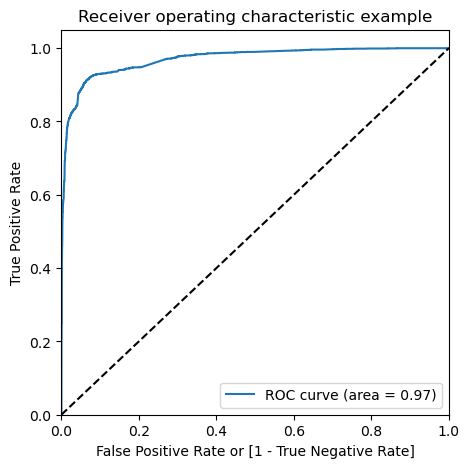

In [322]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- We are getting a good value of 0.97 indicating a good predictive model.

In [323]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0        1.0        0.998849         2873          1    1    1    1    1    1   
1        1.0        0.999493         6823          1    1    1    1    1    1   
2        0.0        0.024781         7258          0    1    0    0    0    0   
3        1.0        0.994280         8327          1    1    1    1    1    1   
4        0.0        0.014222         5940          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    1    1    1    1    1  
2    0    0    0    0    0  
3    1    1    1    1    1  
4    0    0    0    0    0

In [324]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.808362  0.973075  0.708915
0.2   0.2  0.905290  0.931005  0.889764
0.3   0.3  0.924770  0.915860  0.930150
0.4   0.4  0.926354  0.899874  0.942342
0.5   0.5  0.925721  0.880942  0.952756
0.6   0.6  0.916535  0.828776  0.969520
0.7   0.7  0.915109  0.807741  0.979934
0.8   0.8  0.906082  0.774085  0.985776
0.9   0.9  0.888027  0.719815  0.989586

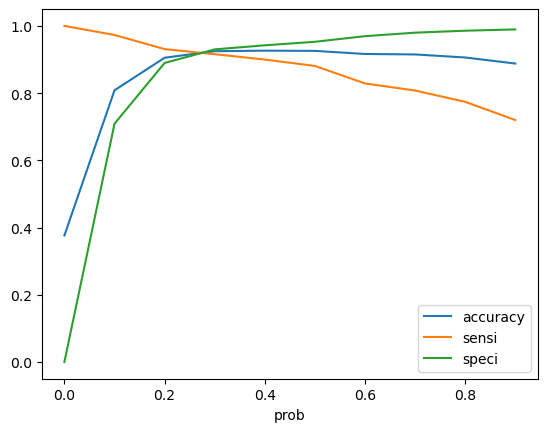

In [325]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [326]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0        1.0        0.998849         2873          1    1    1    1    1    1   
1        1.0        0.999493         6823          1    1    1    1    1    1   
2        0.0        0.024781         7258          0    1    0    0    0    0   
3        1.0        0.994280         8327          1    1    1    1    1    1   
4        0.0        0.014222         5940          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    1    1    1    1    1                1  
1    1    1    1    1    1                1  
2    0    0    0    0    0                0  
3    1    1    1    1    1                1  
4    0    0    0    0    0                0

In [327]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_Predicted  Lead_Score
0        1.0        0.998849         2873                1         100
1        1.0        0.999493         6823                1         100
2        0.0        0.024781         7258                0           2
3        1.0        0.994280         8327                1          99
4        0.0        0.014222         5940                0           1

In [328]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9247703515996198

In [329]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3662,  275],
       [ 200, 2177]], dtype=int64)

In [330]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1]
FN = confusion2[1,0] 

In [331]:
TP / float(TP+FN)

0.9158603281447202

In [332]:
TN / float(TN+FP)

0.9301498602997206

- Accuracy: 92.29%
- Sensitivity: 91.70%
- Specificity: 92.66%

In [333]:
from sklearn.metrics import precision_score, recall_score

In [334]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8878466557911908

In [335]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9158603281447202

In [336]:
from sklearn.metrics import precision_recall_curve

In [337]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

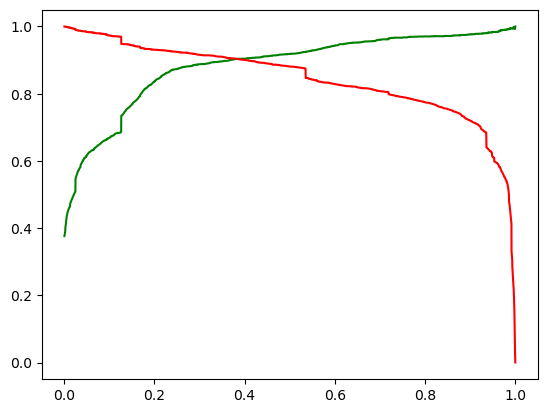

In [338]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [339]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5130    -1.083848                    -0.896947             -1.137345   
6929     0.583516                    -0.843508              1.268810   
1484     0.250043                    -0.666606              0.787579   
6519    -0.416903                     2.016412             -0.174883   
7472    -0.416903                     1.657079             -0.174883   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5130                                False                      False   
6929                                False                      False   
1484                                 True                      False   
6519                                False                      False   
7472                                 True                      False   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
5130                    False                                      False   
6929                    False                                      False   
1484                    False                                      False   
6519                    False                                      False   
7472                    False                                      False   

      What is your current occupation_Other  \
5130                                  False   
6929                                  False   
1484                                  False   
6519                                  False   
7472                                  False   

      What is your current occupation_Student  \
5130                                    False   
6929                                    False   
1484                                    False   
6519                                    False   
7472                                    False   

      What is your current occupation_Unemployed  ...  \
5130                                        True  ...   
6929                                        True  ...   
1484                                        True  ...   
6519                                        True  ...   
7472                                        True  ...   

      Last Notable Activity_Olark Chat Conversation  \
5130                                          False   
6929                                          False   
1484                                          False   
6519                                          False   
7472                                          False   

      Last Notable Activity_Page Visited on Website  \
5130                                          False   
6929                                          False   
1484                                          False   
6519                                          False   
7472                                          False   

      Last Notable Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
5130                           False      False                    False   
6929                           False      False                    False   
1484                           False      False                    False   
6519                            True      False                    False   
7472                            True      False                    False   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
5130                             False              False            False   
6929                             False              False            False   
1484                             False              False            False   
6519                             False              False            False   
7472                             False              False            False   

      Tags_Ringing  Tags_Will revert after reading the email  
5130         False                                     False  
6929         False                              

In [340]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Source_Direct Traffic  \
5130                    -0.896947                       False   
6929                    -0.843508                       False   
1484                    -0.666606                       False   
6519                     2.016412                       False   
7472                     1.657079                        True   

      Lead Source_Welingak Website  Last Activity_SMS Sent  \
5130                         False                   False   
6929                         False                   False   
1484                         False                    True   
6519                         False                    True   
7472                         False                    True   

      Last Notable Activity_Modified  Tags_Closed by Horizzon  \
5130                            True                    False   
6929                           False                    False   
1484                            True                    False   
6519                           False                    False   
7472                           False                    False   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
5130                             False              False            False   
6929                             False              False            False   
1484                             False              False            False   
6519                             False              False            False   
7472                             False              False            False   

      Tags_Ringing  Tags_Will revert after reading the email  
5130         False                                     False  
6929         False                                     False  
1484          True                                     False  
6519          True                                     False  
7472         False                                      True

# PREDICTIONS ON TEST SET

In [341]:
X_test_sm = sm.add_constant(X_test)

In [342]:
np.isnan(X_test_sm).any()
np.isinf(X_test_sm).any()

const                                       False
Total Time Spent on Website                 False
Lead Source_Direct Traffic                  False
Lead Source_Welingak Website                False
Last Activity_SMS Sent                      False
Last Notable Activity_Modified              False
Tags_Closed by Horizzon                     False
Tags_Interested in other courses            False
Tags_Lost to EINS                           False
Tags_Other_Tags                             False
Tags_Ringing                                False
Tags_Will revert after reading the email    False
dtype: bool

In [343]:
# Convert to numeric and handle errors
X_test_sm = X_test_sm.apply(pd.to_numeric, errors='coerce')

In [344]:
# Optionally, drop or fill NaNs
X_test_sm = X_test_sm.fillna(0) 

In [345]:
X_test_sm = X_test_sm.astype(float)

In [346]:
y_test_pred = res.predict(X_test_sm)

In [347]:
y_test[:10]

5130    0
6929    0
1484    0
6519    0
7472    1
7920    0
3962    0
6135    0
8701    1
5461    1
Name: Converted, dtype: int64

In [348]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
5130  0.024304
6929  0.129197
1484  0.007802
6519  0.315287
7472  0.998044

In [351]:
y_test_df = pd.DataFrame(y_test)

In [352]:
y_test_df['Prospect ID'] = y_test_df.index

In [353]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [354]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [355]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         5130  0.024304
1          0         6929  0.129197
2          0         1484  0.007802
3          0         6519  0.315287
4          1         7472  0.998044

In [356]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [357]:
y_pred_final.head()

Converted  Prospect ID  Converted_prob
0          0         5130        0.024304
1          0         6929        0.129197
2          0         1484        0.007802
3          0         6519        0.315287
4          1         7472        0.998044

In [358]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [359]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score
0         5130          0        0.024304           2
1         6929          0        0.129197          13
2         1484          0        0.007802           1
3         6519          0        0.315287          32
4         7472          1        0.998044         100

In [360]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [361]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score  final_Predicted
0         5130          0        0.024304           2                0
1         6929          0        0.129197          13                0
2         1484          0        0.007802           1                0
3         6519          0        0.315287          32                1
4         7472          1        0.998044         100                1

In [362]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9201773835920177

In [363]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1529,  129],
       [  87,  961]], dtype=int64)

In [364]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0] 
# false positives
FP = confusion2[0,1]
# false negatives
FN = confusion2[1,0] 

In [365]:
TP / float(TP+FN)

0.9169847328244275

In [366]:
TN / float(TN+FP)

0.9221954161640531

In [367]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.881651376146789

In [368]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9169847328244275

# Observation:
### After running the model on the Test Data these are the figures we obtain:

- Accuracy: 92.78%
- Sensitivity: 91.98%
- Specificity: 93.26%

# Final Observation:
### Let us compare the values obtained for Train & Test:

#### Train Data: 
- Accuracy: 92.29%
- Sensitivity: 91.70%
- Specificity: 92.66%
#### Test Data: 
- Accuracy: 92.78%
- Sensitivity: 91.98%
- Specificity: 93.26%



- The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model